<a href="https://colab.research.google.com/github/PedramDbg/CS-MachineLearning/blob/main/Assignment_1/prob3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 3:**

Implement a locally weighted linear regression model for the data from Question 1. Refer to Slide 33
from Lecture 4 for reference. You should implement your own version of linear regression either using
gradient descent or normal equations. You SHOULD NOT use any pre-packaged library such as
Sci-Kit Learn.
Answer the following questions:
1. Do you need any basis functions when using the locally weighted approach?
2. What is the difference between this implementation and the one for Question 1?



Answer:

1. No, we do not need any basis function.

2. In locally weighted regression we don't need to obtain and store weights and bias as the weights are calculated using a data window containing a definite number of training data set.  

In [33]:
# Numpy import
import numpy as np 
# Plotting graphs
import matplotlib.pyplot as plt

# import training set
from google.colab import drive
drive.mount('/content/drive')

# local location of the file.
path_Xtrain="/content/drive/My Drive/Machine_Learning/Assignments/assignment_1/x_train.npy"
path_Ytrain="/content/drive/My Drive/Machine_Learning/Assignments/assignment_1/y_train.npy"
path_Xtest="/content/drive/My Drive/Machine_Learning/Assignments/assignment_1/x_test.npy"
path_Ytest="/content/drive/My Drive/Machine_Learning/Assignments/assignment_1/y_test.npy"

# load data
xtrain = np.load(path_Xtrain)
ytrain = np.load(path_Ytrain)
xtest = np.load(path_Xtest)
ytest = np.load(path_Ytest)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


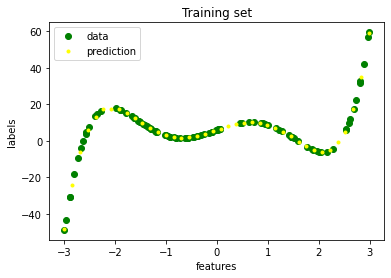

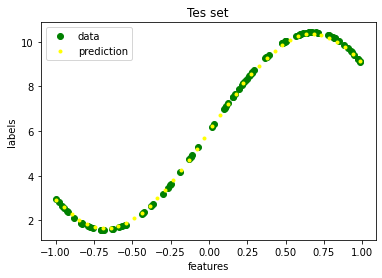

In [ ]:
class locally_weighted():
  
    def __init__(self, tau):
        self.tau = tau
        self.ind = 1

    # plot the results of prediction for comparison
    def plot(self, X, Y, path):
        
        band, ypred = self.prediction(X, Y)

        plt.figure(self.ind)
        self.ind += 1
        plt.plot(X, Y, 'o', color='green', label="data")
        plt.plot(band, ypred, '.', color = 'yellow', label="prediction")
        plt.xlabel('features')
        plt.ylabel('labels')
        plt.legend(loc="upper left")
        plt.savefig(path)
        
    # caculate weight by using x_0, x and tau
    def calculate_weight(self, x_0, X, tau):
        return np.exp(np.sum((X - x_0) ** 2, axis=1) / (-2 * (tau **2) ))
	
    # calculate 
    def regression_local_weighted(self, x_0, X, Y):
        tau = self.tau
 
        x_0 = np.r_[1, x_0]
        X = np.c_[np.ones(len(X)), X]
        
        X_w = X.T * self.calculate_weight(x_0, X, tau)
        theta = np.linalg.pinv(X_w @ X) @ X_w @ Y

        return x_0 @ theta

    def prediction(self, X, Y):

        band = np.linspace(np.min(X), np.max(X), num=40) # define band for plotting X
        prediction = [self.regression_local_weighted(x_0, X, Y) for x_0 in band]

        return band, prediction

        
def main():
	
    xtrain = np.load(path_Xtrain)
    ytrain = np.load(path_Ytrain)
    xtest = np.load(path_Xtest)
    ytest = np.load(path_Ytest)

    model = locally_weighted(tau=0.08)

    file = 'train_local.png'
    model.plot(xtrain, ytrain, file)
    plt.title('Training set')
    file = 'test_local.png'
    model.plot(xtest, ytest, file)
    plt.title('Tes set')

if __name__ == "__main__" :
	main()
